In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import seaborn as sns

sns.set_theme(style="whitegrid")

df = pd.read_csv('salaries.csv')
df = df.dropna()

lista_profissoes_ia = [ #Grupo de profissões selecionado
        'AI Developer', 'AI Scientist', 'AI Programmer', 'Machine Learning Engineer',
        'ML Engineer', 'Data Scientist', 'Applied Scientist', 'Research Scientist',
        'Computer Vision Engineer'
    ]
lista_outras_profissoes_tech = [ #Grupo de profissões selecionado
    'Data Analyst', 'Business Analyst', 'BI Developer', 'Business Intelligence Engineer',
    'Data Engineer', 'Analytics Engineer', 'Data Strategist', 'Data Manager',
    'Software Engineer', 'Backend Developer', 'Frontend Developer', 'Full Stack Engineer',
    'DevOps Engineer', 'Cloud Engineer', 'Site Reliability Engineer',
    'Infrastructure Engineer', 'Engineering Manager', 'Product Manager', 'Security Engineer',
    'Database Administrator'
]

ia_df = df[df['job_title'].isin(lista_profissoes_ia)].copy() #filtrar apenas os cargos que estão na lista de IA
outras_df = df[df['job_title'].isin(lista_outras_profissoes_tech)].copy() #apenas os cargos que estão na lista outras

df = pd.concat([ia_df, outras_df], ignore_index=True) # df concatenado para representar o campo de df que sera trabalhado

Função para criar um espaço entre as barras individuais dos gráficos de barras

In [13]:
def criar_espacamento(ax, espacamento):
    '''
    ax é o gráfico definido
    espacamento é simplesmente o espaço entre as barras
    '''
    #percorremos cada barra (patch) do gráfico
    for patch in ax.patches:
        #pegamos a largura atual da barra
        largura_atual = patch.get_width()
        
        #diminuímos a largura da barra para criar o vão
        patch.set_width(largura_atual - espacamento)
        
        #movemos a barra um pouco para a direita para mantê-la centralizada
        patch.set_x(patch.get_x() + espacamento / 2)

Grupo de dados e campos a serem usados

In [14]:
print(df)

       work_year experience_level employment_type                  job_title  \
0           2025               MI              FT             Data Scientist   
1           2025               MI              FT             Data Scientist   
2           2025               SE              FT  Machine Learning Engineer   
3           2025               SE              FT  Machine Learning Engineer   
4           2025               SE              FT  Machine Learning Engineer   
...          ...              ...             ...                        ...   
84224       2021               MI              FT               Data Analyst   
84225       2021               MI              FT               Data Analyst   
84226       2021               MI              FT              Data Engineer   
84227       2020               MI              FT              Data Engineer   
84228       2021               MI              FT              Data Engineer   

       salary salary_currency  salary_i

**Hipótese de investigação do conjunto de dados escolhido**: (1) O crescimento exponencial da demanda por profissionais de Inteligência Artificial e Ciência de Dados nos últimos anos resultou em um aumento significativamente maior no salário médio de profissionais com maior atuação na área de inteligência artificial (como Data Scientists e Machine Learning Engineers) em comparação com outras profissões de tecnologia mais estabelecidas (como Software Engineers ou Data Analysts) no período de 2020 a 2025. (2) A alta demanda por profissionais ultraespecializados, com o nível de experiência sênior pode ter alavancado o valor da média salarial desses profissionais.

Estatísticas descritivas sobre os bancos de dados:

In [15]:
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,84229.000000,8.422900e+04,84229.000000,84229.000000
mean,2024.269990,1.645557e+05,160540.712439,21.782878
std,0.713435,1.917222e+05,73846.364737,41.211437
min,2020.000000,1.400000e+04,15000.000000,0.000000
25%,2024.000000,1.100000e+05,110000.000000,0.000000
50%,2024.000000,1.500000e+05,150000.000000,0.000000
75%,2025.000000,2.000000e+05,200000.000000,0.000000
max,2025.000000,3.040000e+07,800000.000000,100.000000


Gráfico que ilustra e evolução da média salarial anual das profissões relacionadas à Inteligência Artificial

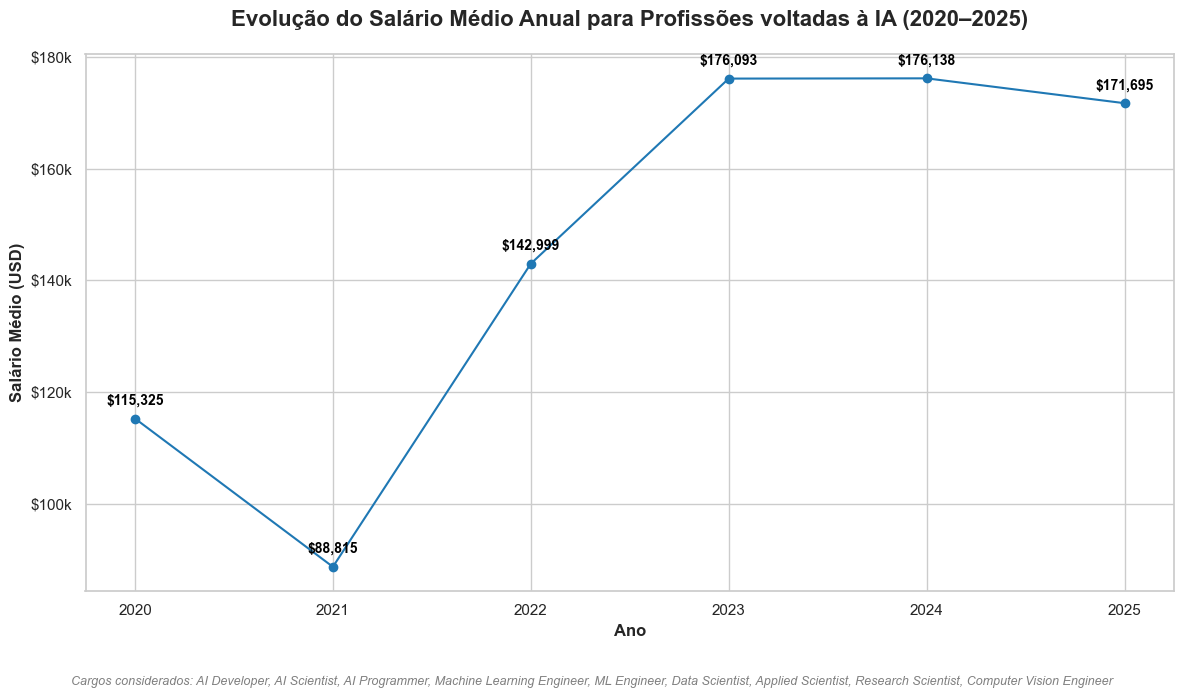

In [16]:
salario_medio_ano = ia_df.groupby('work_year')['salary_in_usd'].mean().sort_index() #agrupar por ano e calcular a média salarial

fig, ax = plt.subplots(figsize=(12, 7))

ax.plot(salario_medio_ano.index, salario_medio_ano.values, marker='o', linestyle='-', color='#1F78B4', label='Salário Médio dos profissionais de IA') #plot da linha

#loop para anotações nos pontos
for ano, salario in salario_medio_ano.items(): ax.text(ano, salario + 2500, f'${salario:,.0f}', ha='center', size=10, fontweight='bold', color='#000000')

ax.set_title('Evolução do Salário Médio Anual para Profissões voltadas à IA (2020–2025)', fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel('Ano', fontsize=12, fontweight='bold')
ax.set_ylabel('Salário Médio (USD)', fontsize=12, fontweight='bold')

#formatar eixo y
formatter = mticker.FuncFormatter(lambda x, _: f'${x/1000:,.0f}k') 
ax.yaxis.set_major_formatter(formatter)

#ticks eixo x
ax.xaxis.set_major_locator(mticker.MaxNLocator(integer=True))
plt.xticks(salario_medio_ano.index.astype(int))
plt.yticks(fontsize=11)

plt.figtext(0.5, 0.01, "Cargos considerados: " + ', '.join(lista_profissoes_ia), ha="center", fontsize=9, style='italic', color='gray') # subtítulo com os cargos da lista

plt.tight_layout(rect=[0, 0.05, 1, 1])
plt.show()

Gráfico que mostra, entre as profissões que trabalham com IA, a evolução da média salarial anual de algumas

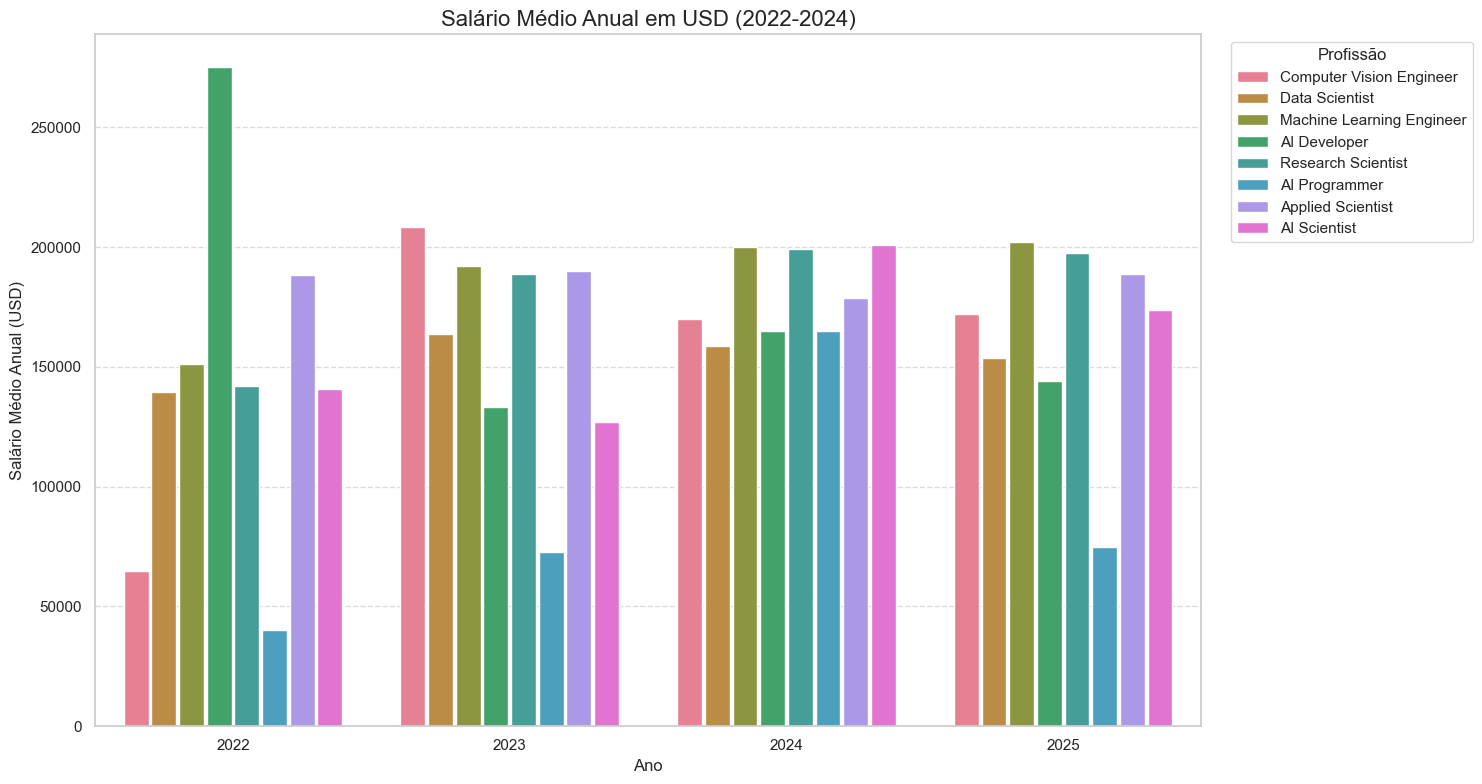

In [17]:
anos_alvo = [2022, 2023, 2024, 2025]
df_filtrado_media_salarial = ia_df[ia_df['work_year'].isin(anos_alvo)]

#criar o gráfico
plt.figure(figsize=(15, 8))

#ax guarda o barplot para usar na função criar_espacamento
ax = sns.barplot(
    data=df_filtrado_media_salarial,
    x="work_year",
    y="salary_in_usd",
    hue="job_title",
    errorbar=None,
    palette=sns.color_palette("husl", n_colors=8)
)
criar_espacamento(ax, 0.01)

plt.title("Salário Médio Anual em USD (2022-2024)", fontsize=16)
plt.ylabel("Salário Médio Anual (USD)", fontsize=12)
plt.xlabel("Ano", fontsize=12)
plt.legend(title="Profissão", bbox_to_anchor=(1.02, 1), loc='upper left')
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

Gráfico que compara o crescimento da média salarial anual das profissões relacionadas à IA com o das demais profissões

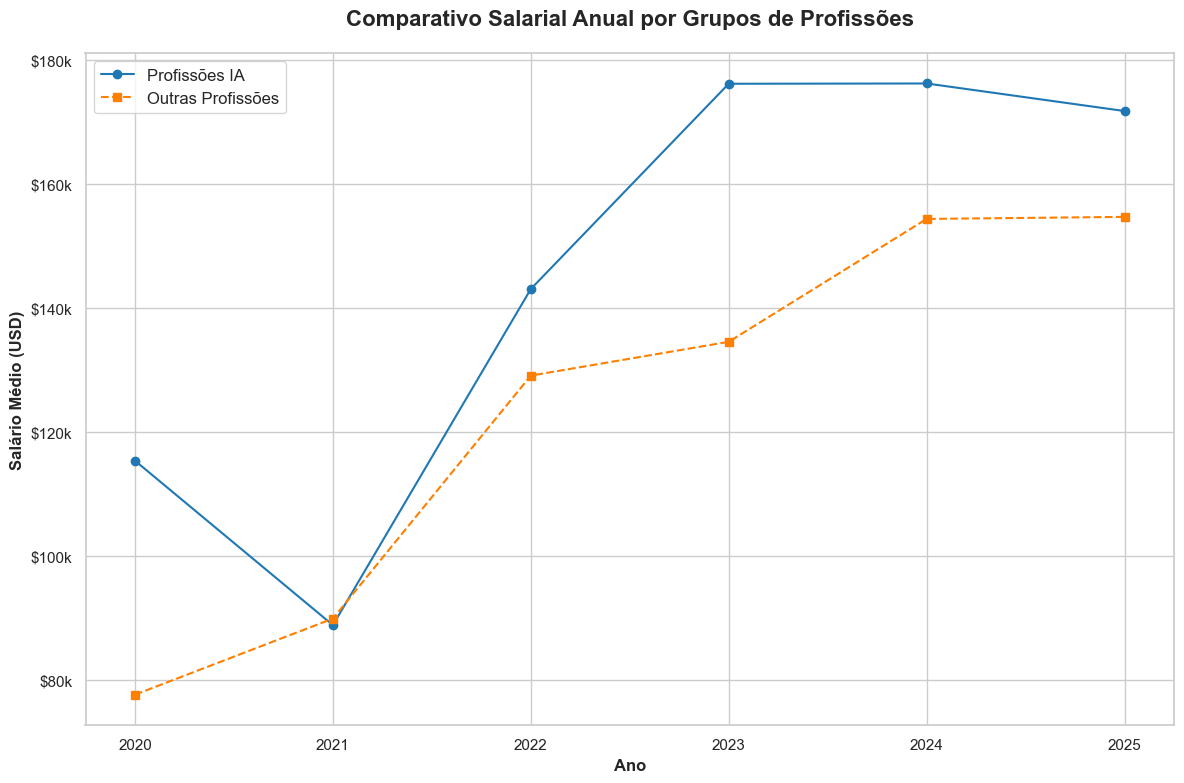

In [18]:
# join com as listas
regex_ia = '|'.join(lista_profissoes_ia)
regex_outras = '|'.join(lista_outras_profissoes_tech)

# filtrar o dataframe para cada grupo de profissões
df_ia = df[df['job_title'].str.contains(regex_ia, case=False, na=False)].copy()
df_outras = df[df['job_title'].str.contains(regex_outras, case=False, na=False)].copy()

# agrupar por ano e calcular a média salarial para cada grupo
avg_ia_salary = df_ia.groupby('work_year')['salary_in_usd'].mean().sort_index()
avg_outras_salary = df_outras.groupby('work_year')['salary_in_usd'].mean().sort_index()

#gráfico
fig, ax = plt.subplots(figsize=(12, 8))

# plotar a linha para profissões de IA
ax.plot(avg_ia_salary.index, avg_ia_salary.values, marker='o', linestyle='-', color='#1F78B4', label='Profissões IA') #paleta Paired do seaborn

# plotar a linha para as outras profissões
ax.plot(avg_outras_salary.index, avg_outras_salary.values, marker='s', linestyle='--', color='#FF7F00', label='Outras Profissões')

#textos
ax.set_title('Comparativo Salarial Anual por Grupos de Profissões', fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel('Ano', fontsize=12, fontweight='bold')
ax.set_ylabel('Salário Médio (USD)', fontsize=12, fontweight='bold')

#formatar o eixo Y
formatter = mticker.FuncFormatter(lambda x, p: f'${x/1000:,.0f}k')
ax.yaxis.set_major_formatter(formatter)

#eixo X
ax.xaxis.set_major_locator(mticker.MaxNLocator(integer=True))
plt.xticks(avg_ia_salary.index.astype(int))
plt.yticks(fontsize=11)

ax.legend(fontsize=12)
plt.tight_layout()
plt.show()

Gráfico do crescimento percentual a cada ano dos dois segmentos de profissões usados. Percebe-se que as profissões de IA cresceram muito nos anos de 2022 e 2023, ano em que foram lançados muitos serviços de inteligência artifical, como o ChatGPT, MidJourney, Gemini e Copilot.

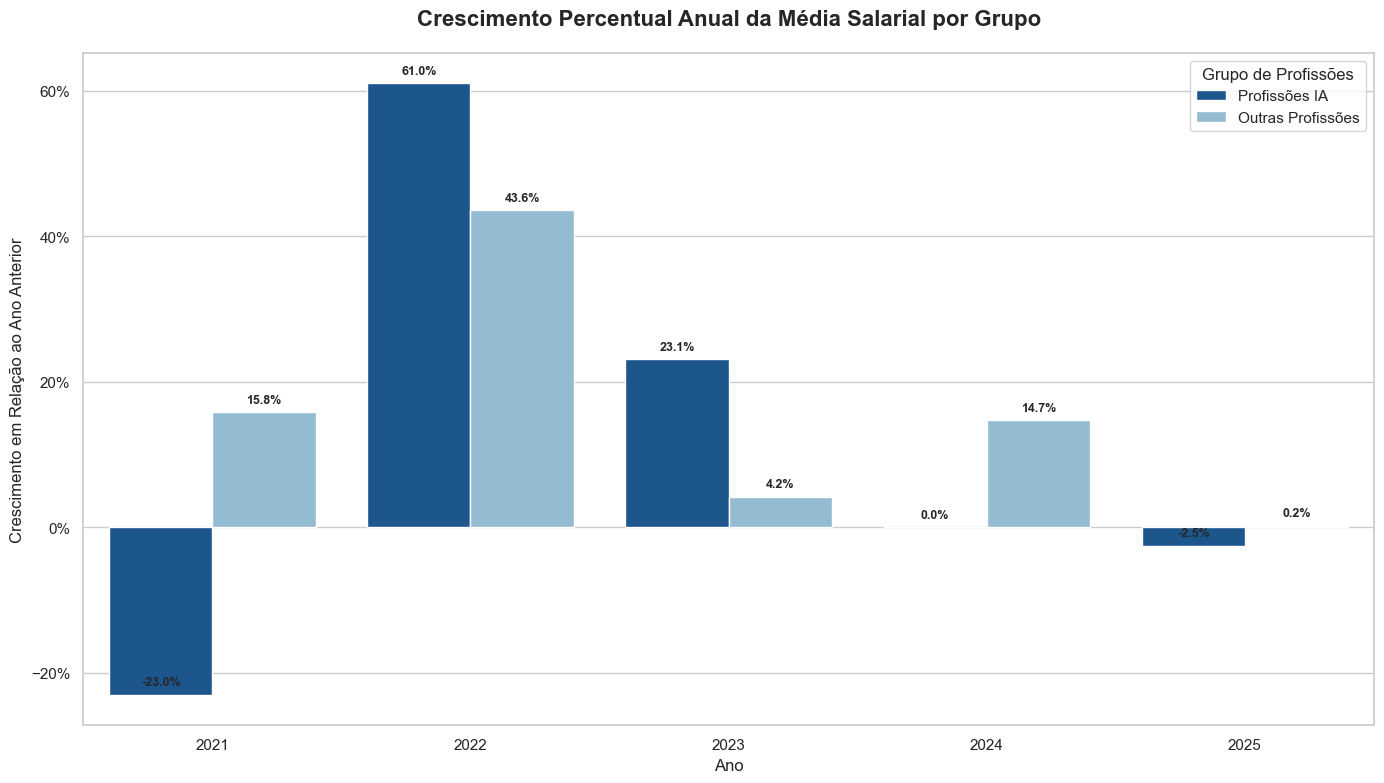

In [19]:
# dataframe para as listas
regex_ia = '|'.join(lista_profissoes_ia)
regex_outras = '|'.join(lista_outras_profissoes_tech)
df_ia = df[df['job_title'].str.contains(regex_ia, case=False, na=False)]
df_outras = df[df['job_title'].str.contains(regex_outras, case=False, na=False)]

#salário médio de cada grupo por ano
group_ia_avg_salary = df_ia.groupby('work_year')['salary_in_usd'].mean()
group_outras_avg_salary = df_outras.groupby('work_year')['salary_in_usd'].mean()
#crescimento percentual para cada grupo
ia_growth = group_ia_avg_salary.pct_change().rename('growth_pct') * 100
outras_growth = group_outras_avg_salary.pct_change().rename('growth_pct') * 100

ia_growth = ia_growth.to_frame()
ia_growth['group'] = 'Profissões IA'
outras_growth = outras_growth.to_frame()
outras_growth['group'] = 'Outras Profissões'

plot_data = pd.concat([ia_growth, outras_growth]).reset_index().dropna()
fig, ax = plt.subplots(figsize=(14, 8))

sns.barplot(
data=plot_data,
x='work_year',
y='growth_pct',
hue='group',
palette={'Profissões IA': '#0B559F', 'Outras Profissões': '#89BEDC'}, #paleta Blues
ax=ax
)

ax.yaxis.set_major_formatter(mticker.PercentFormatter()) #formatar o eixo Y como porcentagem

# loop para adicionar os valores nas barras
for p in ax.patches:
    if p.get_height() != 0:
        ax.annotate(f'{p.get_height():.1f}%',
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center',
                    xytext=(0, 9),
                    textcoords='offset points',
                    fontsize=9,
                    fontweight='bold')

ax.set_title('Crescimento Percentual Anual da Média Salarial por Grupo', fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel('Ano', fontsize=12)
ax.set_ylabel('Crescimento em Relação ao Ano Anterior', fontsize=12)
ax.legend(title='Grupo de Profissões', fontsize=11)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

Gráfico que mostra a demanda na área de IA por nível de experiência no período de 2022 a 2025

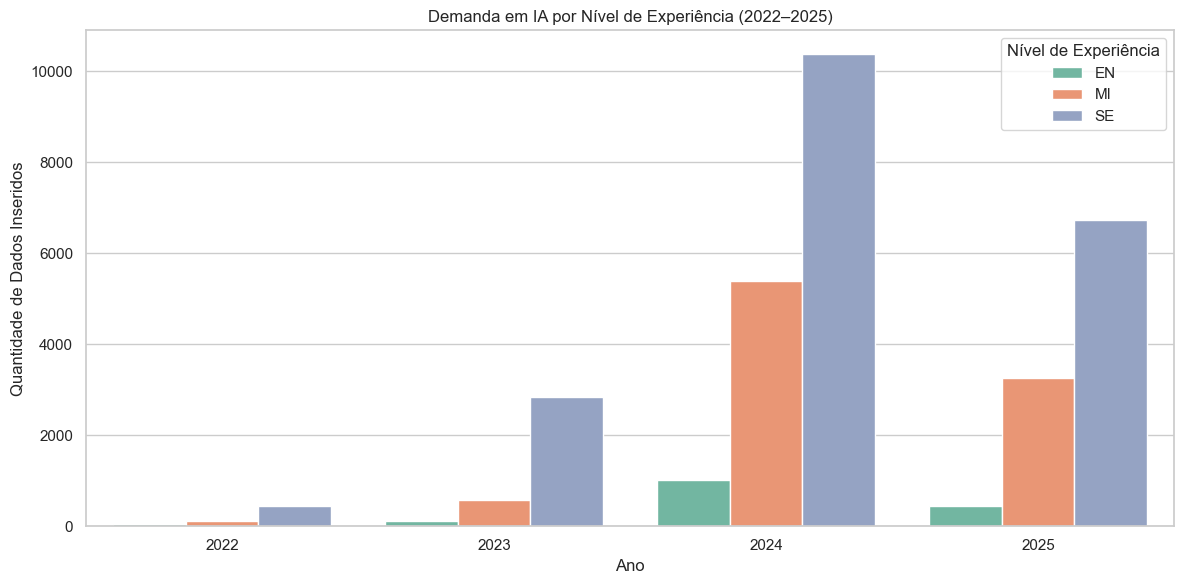

In [20]:
df_filtro = df[df['work_year'].between(2022, 2025)] #filtro para 2022-2025
niveis_experiencia = ['EN', 'MI', 'SE']

df_ia = df_filtro[df_filtro['job_title'].isin(lista_profissoes_ia)]
ia_demand_by_year_experience = df_ia.groupby(['work_year', 'experience_level']).size().reset_index(name='count') # Agrupar e contar por ano e nível de experiência

#ordenar os níveis
ia_demand_by_year_experience['experience_level'] = pd.Categorical(
    ia_demand_by_year_experience['experience_level'],
    categories=niveis_experiencia,
    ordered=True
)

#plot
plt.figure(figsize=(12, 6))
sns.barplot(
    data=ia_demand_by_year_experience,
    x='work_year',
    y='count',
    hue='experience_level',
    palette='Set2'
)
plt.title('Demanda em IA por Nível de Experiência (2022–2025)')
plt.xlabel('Ano')
plt.ylabel('Quantidade de Dados Inseridos')
plt.legend(title='Nível de Experiência')
plt.tight_layout()
plt.show()

Gráficos que relacionam a média salarial anual com o nível de experiência durante o período de 2022 a 2025

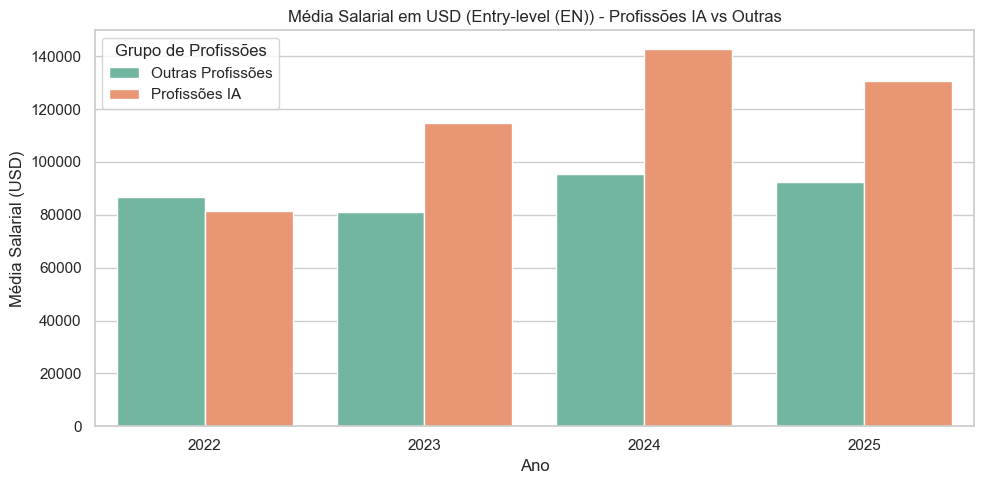

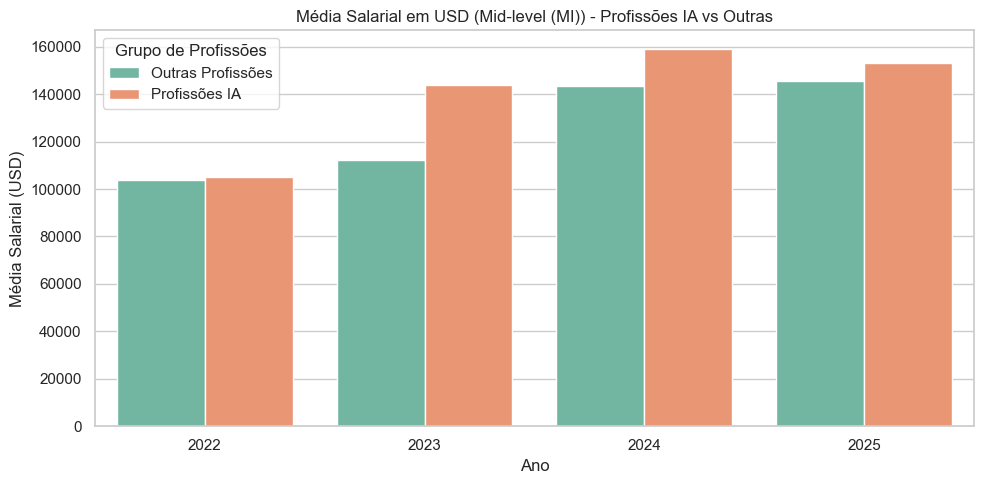

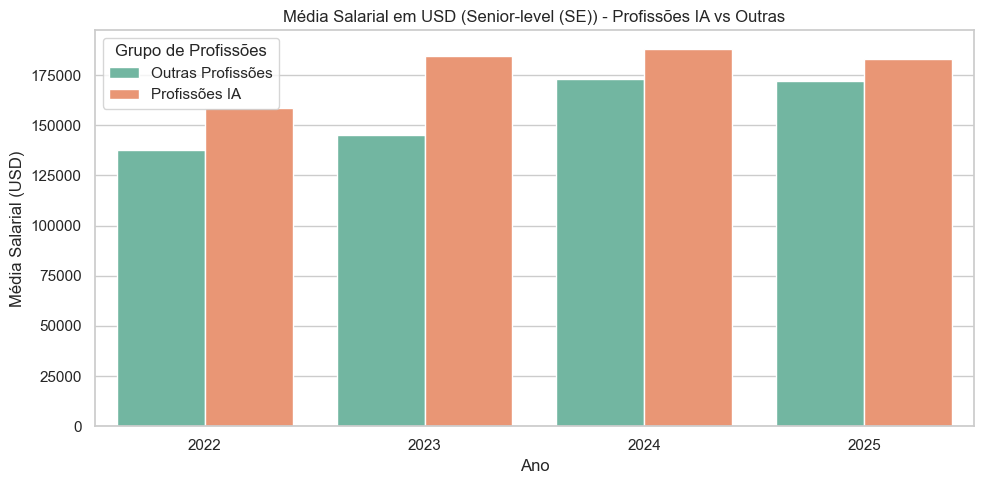

In [21]:
df_filtro = df_filtro.copy()
df_filtro['grupo'] = df_filtro['job_title'].apply(
    lambda title: 'Profissões IA' if title in lista_profissoes_ia  #função lambda para adicionar rótulo do grupo
    else 'Outras Profissões' if title in lista_outras_profissoes_tech 
    else None
)

# Filtrar apenas os dois grupos
df_comparativo = df_filtro[df_filtro['grupo'].notnull()]

#dicionário com os níveis de experiência
titulos = {
    'EN': 'Entry-level (EN)',
    'MI': 'Mid-level (MI)',
    'SE': 'Senior-level (SE)',
}

#loop para criar um gráfico para cada nível
for nivel in niveis_experiencia:
    df_nivel = df_comparativo[df_comparativo['experience_level'] == nivel]
    media_salarial = df_nivel.groupby(['work_year', 'grupo'])['salary_in_usd'].mean().reset_index()
    
    plt.figure(figsize=(10, 5))
    sns.barplot(
        data=media_salarial,
        x='work_year',
        y='salary_in_usd',
        hue='grupo',
        palette='Set2'
    )
    plt.title(f'Média Salarial em USD ({titulos[nivel]}) - Profissões IA vs Outras')
    plt.xlabel('Ano')
    plt.ylabel('Média Salarial (USD)')
    plt.legend(title='Grupo de Profissões')
    plt.tight_layout()
    plt.show()

SKEWNESS e KURTOSIS que mostra a distribuição de salários para as profissões mais relacionadas com inteligência artificial

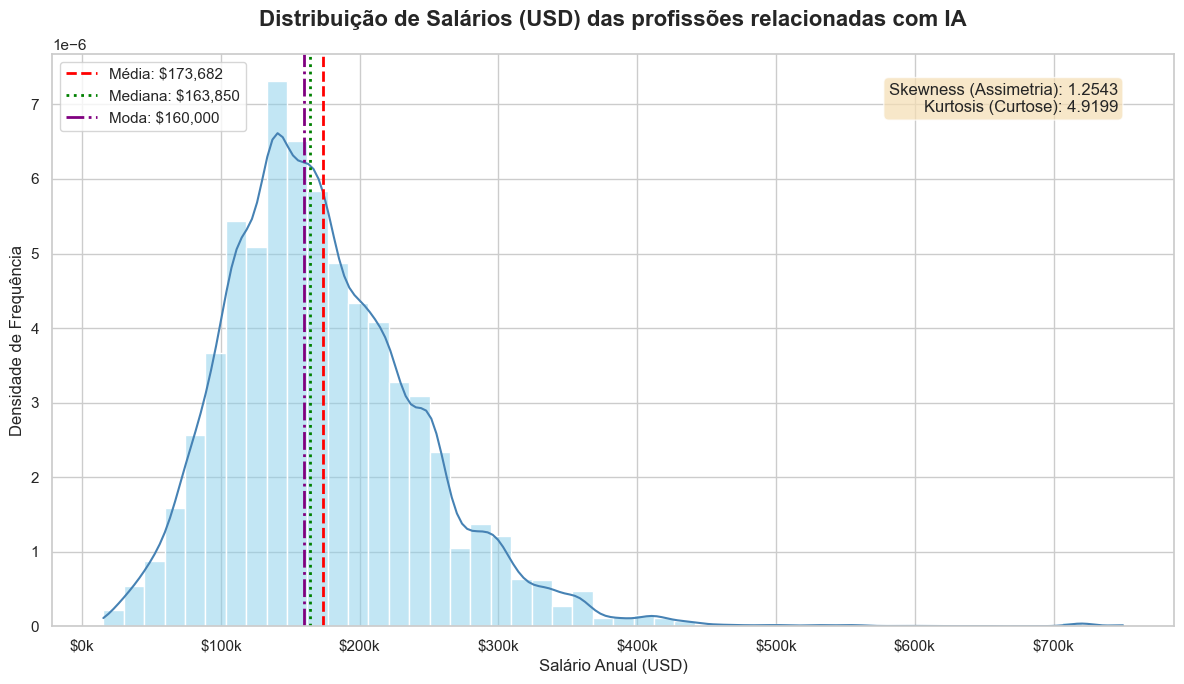

In [22]:
salary_data = ia_df['salary_in_usd']

skewness = salary_data.skew()
kurtosis = salary_data.kurt()
mean_salary = salary_data.mean()
median_salary = salary_data.median()
mode_salary = salary_data.mode()[0]

plt.figure(figsize=(12, 7))

# plotar o histograma e a curva de densidade
ax = sns.histplot(salary_data, kde=True, bins=50, color='skyblue', stat='density')
ax.lines[0].set_color('steelblue') 

#linhas verticais
plt.axvline(mean_salary, color='red', linestyle='--', linewidth=2, label=f'Média: ${mean_salary:,.0f}') # média
plt.axvline(median_salary, color='green', linestyle=':', linewidth=2, label=f'Mediana: ${median_salary:,.0f}') # mediana
plt.axvline(mode_salary, color='purple', linestyle='-.', linewidth=2, label=f'Moda: ${mode_salary:,.0f}') # moda

#texto com Skewness e Kurtosis
text_str = (f"Skewness (Assimetria): {skewness:.4f}\n"f"Kurtosis (Curtose): {kurtosis:.4f}")
props = dict(boxstyle='round', facecolor='wheat', alpha=0.7)
ax.text(0.95, 0.95, text_str, transform=ax.transAxes, fontsize=12, verticalalignment='top', horizontalalignment='right', bbox=props)

#título e rótulos x e y
plt.title('Distribuição de Salários (USD) das profissões relacionadas com IA', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Salário Anual (USD)', fontsize=12)
plt.ylabel('Densidade de Frequência', fontsize=12)

ax.xaxis.set_major_formatter(mticker.FuncFormatter(lambda x, p: f'${x/1000:,.0f}k')) # formatar eixo x dividindo por 1000 e colocar um 'k' para melhor leitura

plt.legend()
plt.tight_layout()

Com os dados apresentados, a hipótese pode ser sustentada. O gráfico de Crescimento Percentual Anual (gráfico 4) demonstra que o aumento salarial para profissões de IA foi drasticamente superior ao de outras áreas de tecnologia, especialmente com um pico em 2022 e 2023, mesmo com baixa em 2024 e leve queda em 2025. A segunda parte da hipótese também é validada, pois o gráfico de Demanda por Nível de Experiência (gráfico 5) mostra uma demanda crescente por profissionais de nível Sênior (SE). Além disso, a análise da distribuição salarial (gráfico 7) revela uma assimetria positiva (skewness), indicando que um número menor de salários muito altos está elevando a média salarial geral do grupo de IA, o que reforça a ideia de que a valorização desses profissionais impulsionou o crescimento médio de toda a área.